In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

class VGG3D(tf.keras.Model):
    def __init__(self, num_classes=2, input_shape=(110, 110, 110, 1)):
        super(VGG3D, self).__init__()
        
        self.conv1 = tf.keras.Sequential([
            layers.Conv3D(8, (3, 3, 3), padding='same', activation='relu', input_shape=input_shape),
            layers.Conv3D(8, (3, 3, 3), padding='same', activation='relu'),
            layers.MaxPooling3D((2, 2, 2), strides=2)
        ])
        
        self.conv2 = tf.keras.Sequential([
            layers.Conv3D(16, (3, 3, 3), padding='same', activation='relu'),
            layers.Conv3D(16, (3, 3, 3), padding='same', activation='relu'),
            layers.MaxPooling3D((2, 2, 2), strides=2)
        ])
        
        self.conv3 = tf.keras.Sequential([
            layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'),
            layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'),
            layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'),
            layers.MaxPooling3D((2, 2, 2), strides=2)
        ])
        
        self.conv4 = tf.keras.Sequential([
            layers.Conv3D(64, (3, 3, 3), padding='same', activation='relu'),
            layers.Conv3D(64, (3, 3, 3), padding='same', activation='relu'),
            layers.Conv3D(64, (3, 3, 3), padding='same', activation='relu'),
            layers.MaxPooling3D((2, 2, 2), strides=2)
        ])
        
        self.fc1 = tf.keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.8)
        ])
        
        self.fc2 = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization()
        ])
        
        self.out = layers.Dense(num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = layers.Flatten()(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.out(x)

# Create an instance of the model
model = VGG3D()


In [25]:
import numpy as np

# Create a dummy batch of data with the correct input shape
dummy_input = np.random.random((1, 110, 110, 110, 1))  # Batch size of 1
model(dummy_input)  # Call the model to build it


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5010237 , 0.50081235]], dtype=float32)>

In [28]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

AttributeError: 'Dense' object has no attribute 'output_shape'

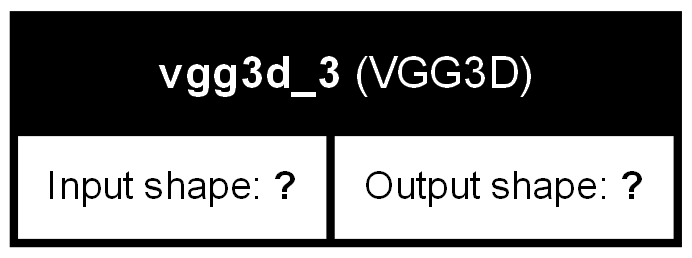

In [26]:
import os

# Example path to Graphviz bin, adjust as necessary to your actual path
graphviz_path = r"D:\Downloads\windows_10_cmake_Release_Graphviz-11.0.0-win64\Graphviz-11.0.0-win64\bin"
os.environ["PATH"] += os.pathsep + graphviz_path

# Now try to plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
